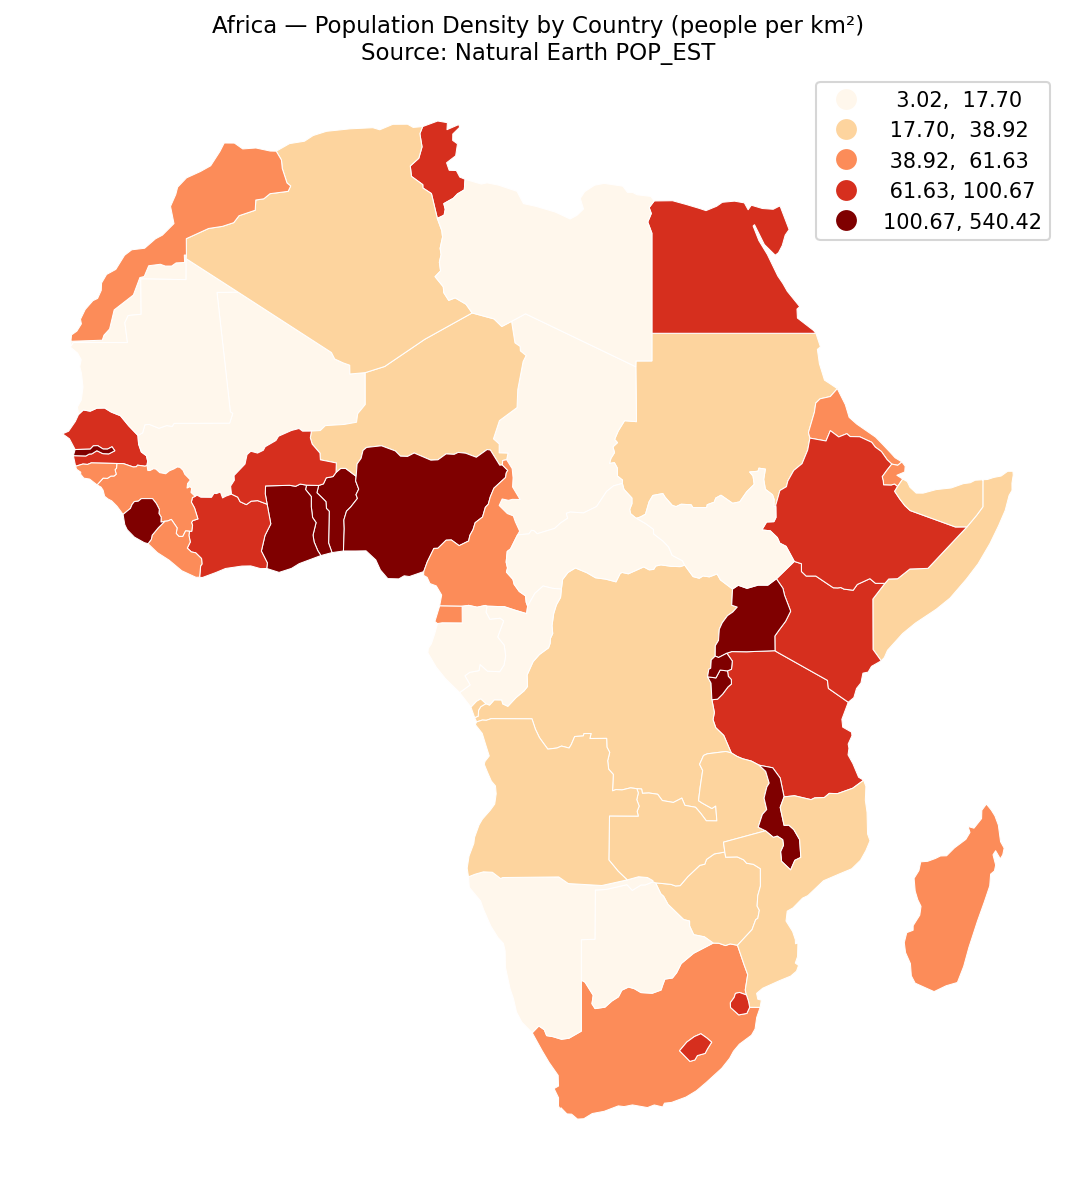

In [6]:
# --- Africa Population Density by Country (Natural Earth) ---
import geopandas as gpd
import matplotlib.pyplot as plt

# 1) 读取国家边界（110m，轻便快速）
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# 2) 只保留非洲国家（用 CONTINENT 字段）
africa = world[world["CONTINENT"] == "Africa"].copy()

# 3) 在等面积投影下计算每个国家的面积（km²）
#    用全球等面积投影 EPSG:6933，避免在经纬度下计算面积失真
africa_eq = africa.to_crs(6933)
africa["area_km2"] = africa_eq.geometry.area / 1e6

# 4) 计算人口密度（人/平方公里）；清理缺失或异常
africa["POP_EST"] = africa["POP_EST"].astype(float)
africa = africa[(africa["POP_EST"] > 0) & (africa["area_km2"] > 0)].copy()
africa["density"] = africa["POP_EST"] / africa["area_km2"]

# 可选：限制极端值，避免图面被离群值“染白/染满”
# africa["density_clipped"] = africa["density"].clip(upper=africa["density"].quantile(0.99))

# 5) 画分级设色图（按分位数），需要安装 mapclassify 才能用 scheme 参数
# pip install mapclassify
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)
africa.plot(
    ax=ax,
    column="density",        # 或换成 "density_clipped"
    cmap="OrRd",
    scheme="Quantiles",      # 分位数分级，更均衡
    k=5,                     # 5级
    legend=True,
    edgecolor="white",
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No data"}
)
ax.set_title("Africa — Population Density by Country (people per km²)\nSource: Natural Earth POP_EST", fontsize=11)
ax.set_axis_off()
plt.tight_layout()
plt.show()


